In [12]:
# Import pandas for data manipulation and analysis
# Pandas provides DataFrame structures to handle tabular data
import pandas as pd

# Import numpy for numerical operations
# Used for mathematical computations and array manipulations
import numpy as np

# Import matplotlib for creating visualizations
# pyplot provides MATLAB-like plotting interface
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
# Built on matplotlib, creates attractive statistical graphics
import seaborn as sns

# Import train_test_split to divide data into training and testing sets
# Essential for evaluating model performance on unseen data
from sklearn.model_selection import train_test_split

# Import StandardScaler to standardize features
# Removes mean and scales to unit variance - important for logistic regression
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression as our baseline model
# Simple, interpretable linear model for binary classification
from sklearn.linear_model import LogisticRegression

# Import Gradient Boosting as our better model
# Ensemble method that builds trees sequentially, each correcting previous errors
from sklearn.ensemble import GradientBoostingClassifier

# Import various metrics to evaluate model performance
from sklearn.metrics import confusion_matrix  # Shows TP, TN, FP, FN
from sklearn.metrics import classification_report  # Precision, recall, f1-score
from sklearn.metrics import f1_score  # Harmonic mean of precision and recall
from sklearn.metrics import roc_auc_score  # Area under ROC curve
from sklearn.metrics import roc_curve  # Data for ROC curve plotting
from sklearn.metrics import precision_recall_curve  # For threshold tuning

# Import SMOTE to handle class imbalance
# Synthetic Minority Over-sampling Technique creates synthetic samples of minority class
from imblearn.over_sampling import SMOTE

# Import json to save metrics in structured format
# Required deliverable: metrics.json file
import json

# Import warnings to suppress unnecessary warning messages
import warnings
warnings.filterwarnings('ignore')

# Import os to handle file paths
import os

# Set random seed for reproducibility
# Ensures same results each time code is run
np.random.seed(42)



🔍 Searching for dataset...
📁 Found dataset at: /kaggle/input/datasets/hassanamin/uci-credit-card/UCI_Credit_Card.csv

📊 Dataset loaded successfully!
Dataset Shape: 30000 rows × 25 columns
Rows: 30000 (each row represents a customer)
Columns: 25 (each column represents a feature)

👀 First 5 rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000

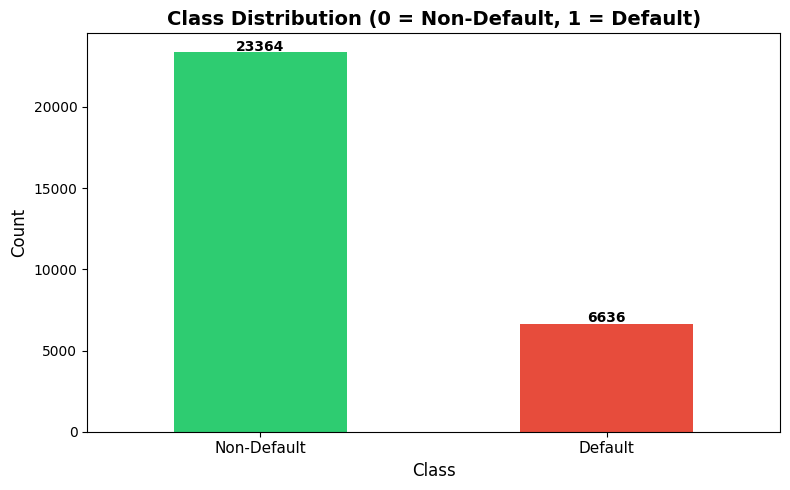


✅ Step 2 Complete: Dataset loaded and explored!
   - Total samples: 30000
   - Features: 24
   - Target: target
   - Class 0 (Non-Default): 23364 samples (77.9%)
   - Class 1 (Default): 6636 samples (22.1%)
   - Class imbalance visualization saved as 'class_distribution.png'


In [13]:
# Find the correct path to our dataset in Kaggle
# Kaggle automatically mounts datasets to /kaggle/input/
print("🔍 Searching for dataset...")

# Use os.walk to recursively search through all directories
# This ensures we find the file regardless of exact path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv'):  # Look for CSV files
            file_path = os.path.join(dirname, filename)
            print(f"📁 Found dataset at: {file_path}")

# Load the CSV file into a pandas DataFrame
# DataFrame is a 2D labeled data structure
df = pd.read_csv(file_path)

print("\n📊 Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Rows: {df.shape[0]} (each row represents a customer)")
print(f"Columns: {df.shape[1]} (each column represents a feature)")

# Display first 5 rows to understand data structure
# head() shows column names and sample values
print("\n👀 First 5 rows of the dataset:")
print(df.head())

# Get column names to identify features and target
print("\n📋 Column Names:")
for i, col in enumerate(df.columns):
    print(f"  {i}: {col}")

# Check for missing values in the dataset
# Missing values can affect model performance
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "  No missing values found!")

# Get basic statistical information about numerical columns
# Includes count, mean, std, min, quartiles, max
print("\n📈 Statistical Summary:")
print(df.describe())

# Identify the target column (default payment indicator)
# Usually contains 'default' in column name
target_col = None
for col in df.columns:
    if 'default' in col.lower():
        target_col = col
        break

# If no column with 'default' found, assume last column is target
if target_col is None:
    target_col = df.columns[-1]
    
print(f"\n🎯 Target column identified as: '{target_col}'")

# Check distribution of target variable
# This reveals class imbalance problem
print(f"\n📊 Target Variable Distribution:")
print(df[target_col].value_counts())
print(f"\n📊 Target Variable Distribution (Percentage):")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize class imbalance with a bar chart
plt.figure(figsize=(8, 5))  # Create figure with specific size

# Create bar plot showing count of each class
ax = df[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])

# Customize the plot
plt.title('Class Distribution (0 = Non-Default, 1 = Default)', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0, fontsize=11)

# Add value labels on top of bars
for i, v in enumerate(df[target_col].value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Step 2 Complete: Dataset loaded and explored!")
print(f"   - Total samples: {df.shape[0]}")
print(f"   - Features: {df.shape[1]-1}")
print(f"   - Target: {target_col}")
print(f"   - Class 0 (Non-Default): {sum(df[target_col]==0)} samples ({sum(df[target_col]==0)/len(df)*100:.1f}%)")
print(f"   - Class 1 (Default): {sum(df[target_col]==1)} samples ({sum(df[target_col]==1)/len(df)*100:.1f}%)")
print("   - Class imbalance visualization saved as 'class_distribution.png'")

In [14]:
# Separate features (X) and target (y)
# Features are input variables used for prediction
# Target is what we want to predict (default or not)

print("🔧 Step 3: Data Preprocessing")

# Remove ID column if it exists (not useful for prediction)
if 'ID' in df.columns:
    print("  - Removing 'ID' column (not useful for prediction)")
    X = df.drop(['ID', target_col], axis=1)
else:
    X = df.drop([target_col], axis=1)

# Target variable (what we want to predict)
y = df[target_col]

print(f"\n📊 Features (X) shape: {X.shape}")
print(f"   - {X.shape[1]} features will be used for prediction")
print(f"   - Feature names: {list(X.columns)}")

print(f"\n📊 Target (y) shape: {y.shape}")
print(f"   - Target values: 0 = Non-Default, 1 = Default")

# Display feature information
print("\n📋 Feature Details:")
print(X.info())

# Check for any non-numeric columns that need encoding
print("\n🔍 Checking data types:")
print(X.dtypes.value_counts())

# If there are categorical columns, we'd need to encode them
# But UCI Credit Card dataset is already numeric
print("\n✅ All features are numeric - no encoding needed!")

print("\n✅ Step 3 Complete: Features and target separated!")
print(f"   - {X.shape[1]} features selected")
print(f"   - Target variable: {target_col}")

🔧 Step 3: Data Preprocessing
  - Removing 'ID' column (not useful for prediction)

📊 Features (X) shape: (30000, 23)
   - 23 features will be used for prediction
   - Feature names: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

📊 Target (y) shape: (30000,)
   - Target values: 0 = Non-Default, 1 = Default

📋 Feature Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  i

In [15]:
# Split data into training and testing sets
# Training set: Used to train the model
# Testing set: Used to evaluate model performance on unseen data

print("✂️ Step 4: Train-Test Split")

# train_test_split randomly splits the data
# test_size=0.2 means 20% for testing, 80% for training
# random_state=42 ensures reproducibility (same split each time)
# stratify=y maintains class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% test, 80% train
    random_state=42,       # For reproducibility
    stratify=y             # Maintain class balance
)

print(f"\n📊 Split Summary:")
print(f"   - Total samples: {len(X)}")
print(f"   - Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Check class distribution in both sets to ensure stratification worked
print(f"\n📈 Class Distribution Check:")
print(f"   Training set - Non-Default: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.1f}%)")
print(f"   Training set - Default: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.1f}%)")
print(f"   Testing set - Non-Default: {sum(y_test==0)} ({sum(y_test==0)/len(y_test)*100:.1f}%)")
print(f"   Testing set - Default: {sum(y_test==1)} ({sum(y_test==1)/len(y_test)*100:.1f}%)")

# Verify that class distributions are similar
train_default_pct = sum(y_train==1)/len(y_train)*100
test_default_pct = sum(y_test==1)/len(y_test)*100
print(f"\n✅ Stratification successful!" if abs(train_default_pct - test_default_pct) < 1 
      else f"⚠️ Stratification issue - check split")

print("\n✅ Step 4 Complete: Data split into training and testing sets!")
print(f"   - X_train: {X_train.shape} (features for training)")
print(f"   - X_test: {X_test.shape} (features for testing)")
print(f"   - y_train: {y_train.shape} (target for training)")
print(f"   - y_test: {y_test.shape} (target for testing)")

✂️ Step 4: Train-Test Split

📊 Split Summary:
   - Total samples: 30000
   - Training set size: 24000 samples (80.0%)
   - Testing set size: 6000 samples (20.0%)

📈 Class Distribution Check:
   Training set - Non-Default: 18691 (77.9%)
   Training set - Default: 5309 (22.1%)
   Testing set - Non-Default: 4673 (77.9%)
   Testing set - Default: 1327 (22.1%)

✅ Stratification successful!

✅ Step 4 Complete: Data split into training and testing sets!
   - X_train: (24000, 23) (features for training)
   - X_test: (6000, 23) (features for testing)
   - y_train: (24000,) (target for training)
   - y_test: (6000,) (target for testing)


In [16]:
# Standardize features to have mean=0 and standard deviation=1
# Many ML algorithms perform better with scaled features

print("⚖️ Step 5: Feature Scaling")

# Initialize StandardScaler
# This will compute mean and std from training data
scaler = StandardScaler()

# Fit the scaler on training data and transform it
# fit() calculates mean and std, transform() applies scaling
print("  - Fitting scaler on training data...")
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
# Important: Don't fit on test data - use training parameters
print("  - Transforming test data using training parameters...")
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"\n📊 Before Scaling (first 5 rows, first 5 features):")
print(X_train.iloc[:5, :5])

print(f"\n📊 After Scaling (first 5 rows, first 5 features):")
print(X_train_scaled_df.iloc[:5, :5])

# Verify scaling worked
print(f"\n🔍 Scaling Verification:")
print(f"   Training data - Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"   Training data - Std: {X_train_scaled.std():.6f} (should be ~1)")
print(f"   Test data - Mean: {X_test_scaled.mean():.6f}")
print(f"   Test data - Std: {X_test_scaled.std():.6f}")

print("\n✅ Step 5 Complete: Features standardized!")
print("   - All features now have mean=0 and standard deviation=1")
print("   - Scaling prevents features with larger magnitudes from dominating")

⚖️ Step 5: Feature Scaling
  - Fitting scaler on training data...
  - Transforming test data using training parameters...

📊 Before Scaling (first 5 rows, first 5 features):
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
22788   160000.0    2          2         2   33
29006   150000.0    2          1         2   34
16950    10000.0    1          2         1   50
22280   220000.0    2          1         2   29
11346   310000.0    2          1         2   32

📊 After Scaling (first 5 rows, first 5 features):
   LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE
0  -0.056866  0.80844   0.184523  0.856739 -0.264558
1  -0.134081  0.80844  -1.077532  0.856739 -0.155804
2  -1.215090 -1.23695   0.184523 -1.059367  1.584260
3   0.406423  0.80844  -1.077532  0.856739 -0.699574
4   1.101358  0.80844  -1.077532  0.856739 -0.373312

🔍 Scaling Verification:
   Training data - Mean: 0.000000 (should be ~0)
   Training data - Std: 1.000000 (should be ~1)
   Test data - Mean: 0.006266
   Test data - St

🔄 Step 6: Handling Class Imbalance with SMOTE

📊 Before SMOTE:
   Class 0 (Non-Default): 18691 samples
   Class 1 (Default): 5309 samples
   Ratio: 1:3.5

  - Creating synthetic samples for minority class...

📊 After SMOTE:
   Class 0 (Non-Default): 18691 samples
   Class 1 (Default): 18691 samples
   Ratio: 1:1.0

📈 SMOTE created 13382 synthetic default samples

🔍 Test data remains imbalanced (as it should):
   Test - Class 0: 4673
   Test - Class 1: 1327


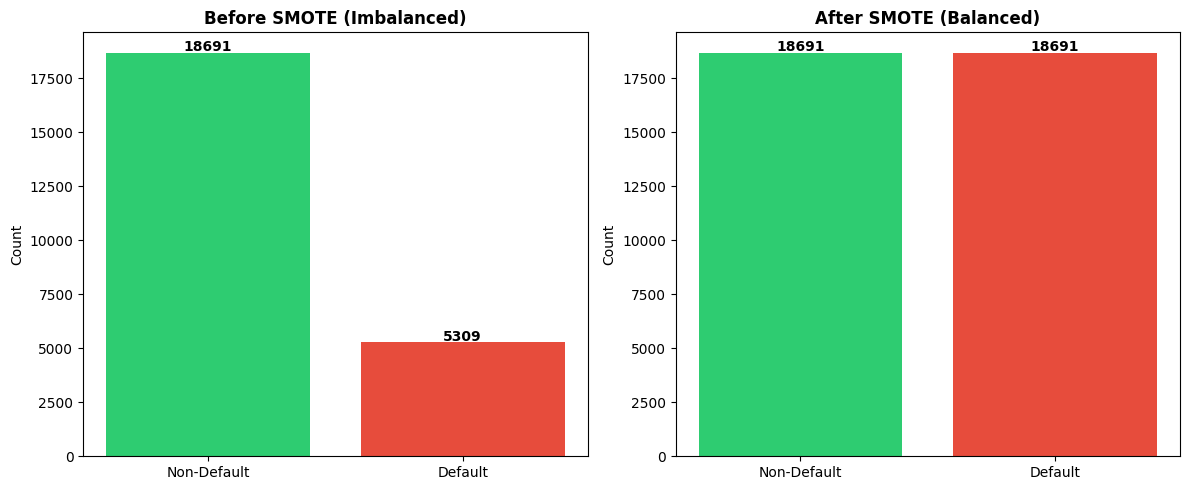


✅ Step 6 Complete: Class imbalance handled with SMOTE!
   - Both classes now have equal representation in training data
   - SMOTE visualization saved as 'smote_effect.png'
   - Test data remains imbalanced for realistic evaluation


In [17]:
# Apply SMOTE to handle class imbalance
# SMOTE creates synthetic samples of minority class

print("🔄 Step 6: Handling Class Imbalance with SMOTE")

# Before SMOTE - show imbalance
print(f"\n📊 Before SMOTE:")
print(f"   Class 0 (Non-Default): {sum(y_train==0)} samples")
print(f"   Class 1 (Default): {sum(y_train==1)} samples")
print(f"   Ratio: 1:{sum(y_train==0)/sum(y_train==1):.1f}")

# Initialize SMOTE
# random_state ensures reproducible synthetic samples
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only!
# Important: Never apply SMOTE to test data
print("\n  - Creating synthetic samples for minority class...")
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# After SMOTE - show balanced classes
print(f"\n📊 After SMOTE:")
print(f"   Class 0 (Non-Default): {sum(y_train_balanced==0)} samples")
print(f"   Class 1 (Default): {sum(y_train_balanced==1)} samples")
print(f"   Ratio: 1:{sum(y_train_balanced==0)/sum(y_train_balanced==1):.1f}")

# Calculate how many synthetic samples were created
synthetic_samples = sum(y_train_balanced==1) - sum(y_train==1)
print(f"\n📈 SMOTE created {synthetic_samples} synthetic default samples")

# Show that test data remains unchanged
print(f"\n🔍 Test data remains imbalanced (as it should):")
print(f"   Test - Class 0: {sum(y_test==0)}")
print(f"   Test - Class 1: {sum(y_test==1)}")

# Visualize the effect of SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax1.bar(['Non-Default', 'Default'], [sum(y_train==0), sum(y_train==1)], 
        color=['#2ecc71', '#e74c3c'])
ax1.set_title('Before SMOTE (Imbalanced)', fontweight='bold')
ax1.set_ylabel('Count')
for i, v in enumerate([sum(y_train==0), sum(y_train==1)]):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

# After SMOTE
ax2.bar(['Non-Default', 'Default'], [sum(y_train_balanced==0), sum(y_train_balanced==1)], 
        color=['#2ecc71', '#e74c3c'])
ax2.set_title('After SMOTE (Balanced)', fontweight='bold')
ax2.set_ylabel('Count')
for i, v in enumerate([sum(y_train_balanced==0), sum(y_train_balanced==1)]):
    ax2.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('smote_effect.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Step 6 Complete: Class imbalance handled with SMOTE!")
print("   - Both classes now have equal representation in training data")
print("   - SMOTE visualization saved as 'smote_effect.png'")
print("   - Test data remains imbalanced for realistic evaluation")

In [20]:
# Train Logistic Regression as baseline model
# Simple, interpretable, fast to train

print("🔵 Step 7: Baseline Model - Logistic Regression")

# Initialize Logistic Regression model
# random_state for reproducibility
# max_iter=1000 ensures convergence
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on balanced training data
print("  - Training Logistic Regression model...")
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions on test data
# predict() gives class labels (0 or 1)
print("  - Making predictions on test data...")
y_pred_log = log_reg.predict(X_test_scaled)

# Get prediction probabilities
# predict_proba() gives probability for each class
# We take [:, 1] to get probability of default (class 1)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate F1 Score
# Harmonic mean of precision and recall
# Better than accuracy for imbalanced data
f1_log = f1_score(y_test, y_pred_log)

# Calculate ROC-AUC Score
# Area Under ROC Curve - measures model's ability to distinguish classes
# Range: 0.5 (random) to 1.0 (perfect)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

print(f"\n📊 Logistic Regression Performance:")
print(f"   F1 Score: {f1_log:.4f}")
print(f"   ROC-AUC Score: {roc_auc_log:.4f}")

# Detailed classification report
print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_log, 
                          target_names=['Non-Default', 'Default']))

# Calculate additional metrics for understanding
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"\n📈 Additional Metrics:")
print(f"   Precision: {precision_log:.4f} (of predicted defaults, how many were correct)")
print(f"   Recall: {recall_log:.4f} (of actual defaults, how many were caught)")
print(f"   Accuracy: {accuracy_log:.4f} (overall correct predictions)")



🔵 Step 7: Baseline Model - Logistic Regression
  - Training Logistic Regression model...
  - Making predictions on test data...

📊 Logistic Regression Performance:
   F1 Score: 0.4587
   ROC-AUC Score: 0.7104

📋 Detailed Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.87      0.68      0.77      4673
     Default       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.75      0.67      0.70      6000


📈 Additional Metrics:
   Precision: 0.3614 (of predicted defaults, how many were correct)
   Recall: 0.6277 (of actual defaults, how many were caught)
   Accuracy: 0.6723 (overall correct predictions)


🟢 Step 8: Better Model - Gradient Boosting
  - Training Gradient Boosting model (this may take a moment)...
  - Making predictions on test data...

📊 Gradient Boosting Performance:
   F1 Score: 0.5224
   ROC-AUC Score: 0.7666

📋 Detailed Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.86      0.88      0.87      4673
     Default       0.54      0.51      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.79      6000


📊 Model Comparison:
   Metric          Logistic        Gradient Boosting Improvement    
   ------------------------------------------------------------
   F1 Score        0.4587          0.5224          +0.0637
   ROC-AUC         0.7104          0.7666          +0.0562

🔝 Top 5 Most Important Features:
  feature  importance
    PAY_0    0.472166
LIMIT_BAL    0.166186
EDUCATION    0.050456
    PAY_6    0.041

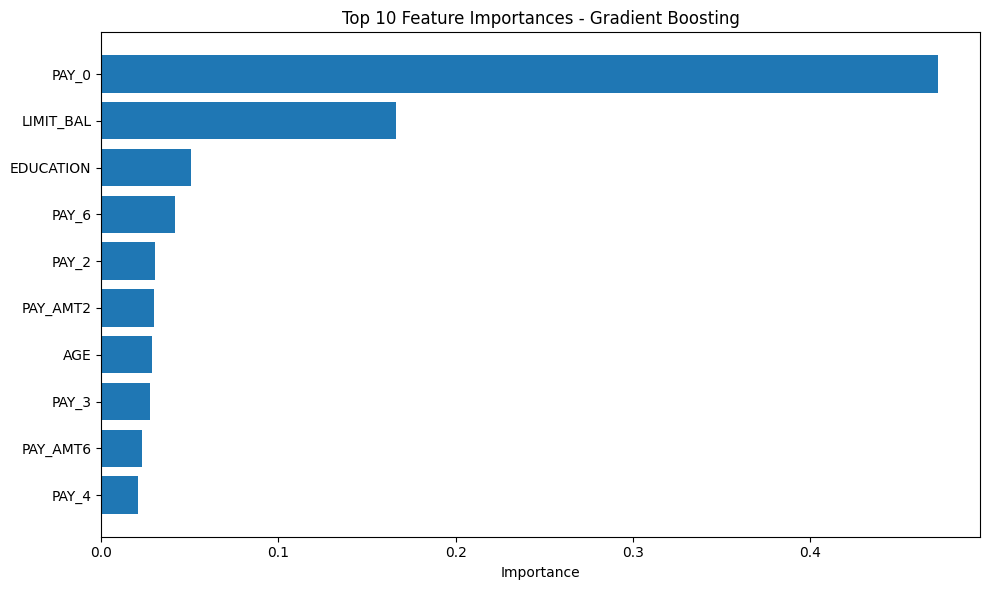

In [21]:
# Train Gradient Boosting as better model
# Ensemble method that typically outperforms logistic regression

print("🟢 Step 8: Better Model - Gradient Boosting")

# Initialize Gradient Boosting Classifier
# n_estimators: number of boosting stages (trees)
# learning_rate: shrinks contribution of each tree
# max_depth: limits tree complexity to prevent overfitting
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # 100 trees in the ensemble
    learning_rate=0.1,      # Slower learning = better generalization
    max_depth=3,            # Trees depth (3 is moderate)
    random_state=42         # For reproducibility
)

# Train the model on balanced training data
print("  - Training Gradient Boosting model (this may take a moment)...")
gb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on test data
print("  - Making predictions on test data...")
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate F1 Score
f1_gb = f1_score(y_test, y_pred_gb)

# Calculate ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"\n📊 Gradient Boosting Performance:")
print(f"   F1 Score: {f1_gb:.4f}")
print(f"   ROC-AUC Score: {roc_auc_gb:.4f}")

# Detailed classification report
print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_gb, 
                          target_names=['Non-Default', 'Default']))

# Compare with baseline
print(f"\n📊 Model Comparison:")
print(f"   {'Metric':<15} {'Logistic':<15} {'Gradient Boosting':<15} {'Improvement':<15}")
print(f"   {'-'*60}")
print(f"   {'F1 Score':<15} {f1_log:<15.4f} {f1_gb:<15.4f} {(f1_gb-f1_log):<+.4f}")
print(f"   {'ROC-AUC':<15} {roc_auc_log:<15.4f} {roc_auc_gb:<15.4f} {(roc_auc_gb-roc_auc_log):<+.4f}")

# Feature importance from Gradient Boosting
# Shows which features most influence predictions
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 5 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()



🎯 Step 9: Threshold Tuning

📊 Threshold Analysis:
   Default threshold: 0.5000
   Optimal threshold: 0.4697
   F1 Score at default threshold: 0.5224
   F1 Score at optimal threshold: 0.5302
   Improvement: 0.0078

📈 Performance with Optimal Threshold:
   Precision: 0.5211 (vs 0.5403)
   Recall: 0.5396 (vs 0.5057)
   F1 Score: 0.5302 (vs 0.5224)


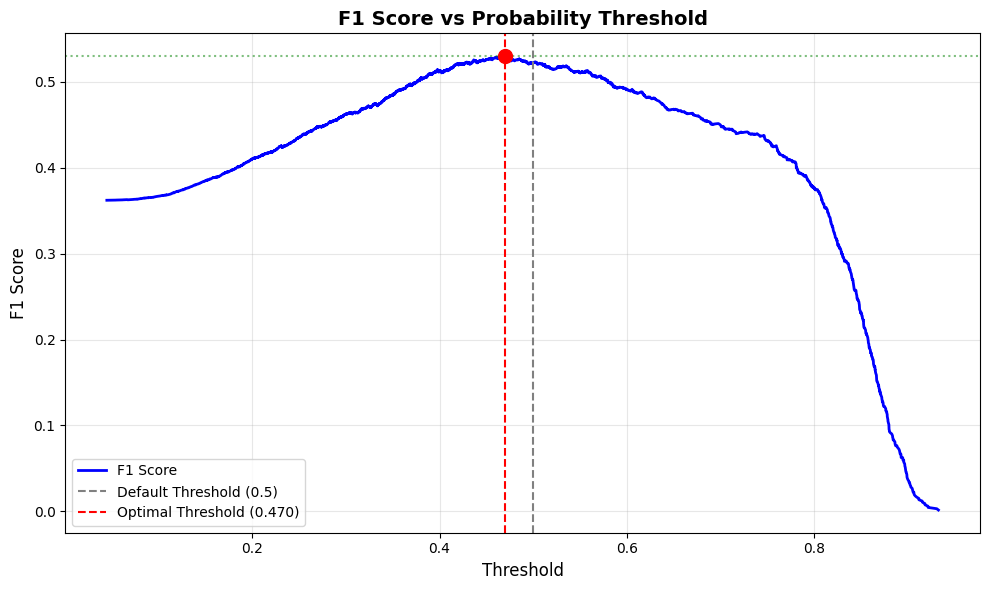

In [23]:
# Find optimal probability threshold to maximize F1 score
# Default threshold is 0.5, but optimal might be different

print("🎯 Step 9: Threshold Tuning")

# Get precision, recall, and thresholds from precision-recall curve
# precision_recall_curve returns values at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_gb)

# Calculate F1 score for each threshold
# F1 = 2 * (precision * recall) / (precision + recall)
# Add small epsilon to avoid division by zero
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Remove the last element of f1_scores (corresponds to no threshold)
f1_scores = f1_scores[:-1]

# Find threshold that gives maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"\n📊 Threshold Analysis:")
print(f"   Default threshold: 0.5000")
print(f"   Optimal threshold: {optimal_threshold:.4f}")
print(f"   F1 Score at default threshold: {f1_gb:.4f}")
print(f"   F1 Score at optimal threshold: {optimal_f1:.4f}")
print(f"   Improvement: {optimal_f1 - f1_gb:.4f}")

# Apply optimal threshold to get new predictions
y_pred_optimal = (y_pred_proba_gb >= optimal_threshold).astype(int)

# Calculate metrics with optimal threshold
f1_optimal = f1_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)

print(f"\n📈 Performance with Optimal Threshold:")
print(f"   Precision: {precision_optimal:.4f} (vs {precision_score(y_test, y_pred_gb):.4f})")
print(f"   Recall: {recall_optimal:.4f} (vs {recall_score(y_test, y_pred_gb):.4f})")
print(f"   F1 Score: {f1_optimal:.4f} (vs {f1_gb:.4f})")

# Visualize F1 scores across thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, 'b-', linewidth=2, label='F1 Score')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', 
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.axhline(y=optimal_f1, color='green', linestyle=':', alpha=0.5)
plt.scatter(optimal_threshold, optimal_f1, color='red', s=100, zorder=5)

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs Probability Threshold', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('threshold_tuning.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Step 10: Creating Confusion Matrices

📊 Confusion Matrix - Default Threshold (0.5):
                 Predicted
                 Non-Default  Default
Actual Non-Default      4102         571
Actual Default            656         671

📊 Confusion Matrix - Optimal Threshold (0.470):
                 Predicted
                 Non-Default  Default
Actual Non-Default      4015         658
Actual Default            611         716

📈 Metrics from Default Threshold (0.5):
   True Negatives: 4102 (correctly predicted non-default)
   False Positives: 571 (incorrectly predicted default)
   False Negatives: 656 (missed defaults)
   True Positives: 671 (correctly predicted defaults)

📈 Metrics from Optimal Threshold (0.470):
   True Negatives: 4015 (correctly predicted non-default)
   False Positives: 658 (incorrectly predicted default)
   False Negatives: 611 (missed defaults)
   True Positives: 716 (correctly predicted defaults)

💼 Business Impact:
   Default Threshold - Missed 656 defaults (c

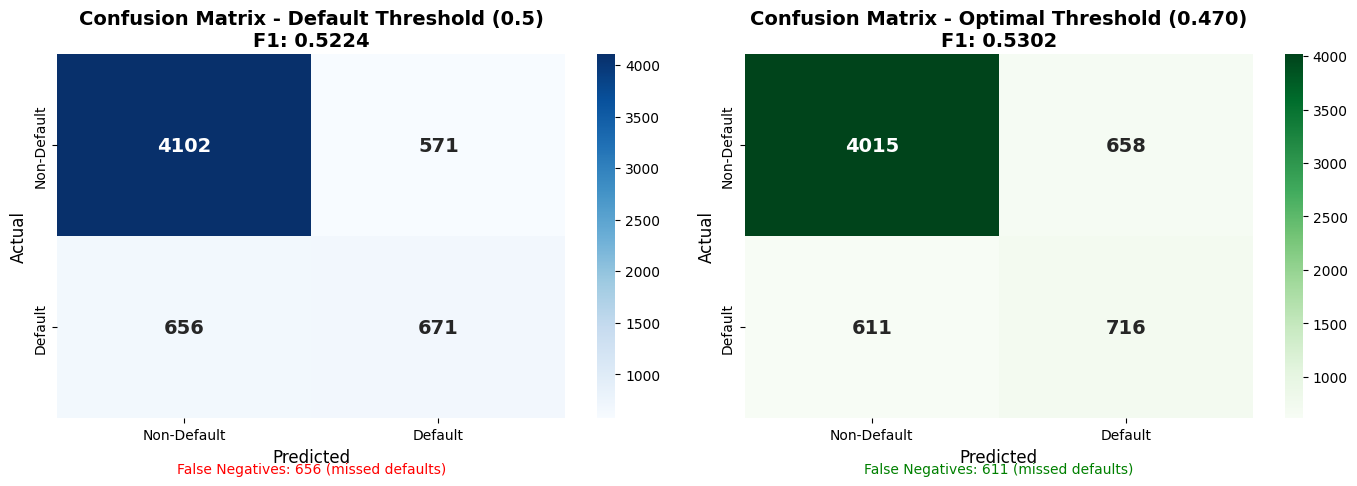

In [25]:
# Create confusion matrices for default and optimal thresholds
# Confusion matrix shows TP, TN, FP, FN

print("📊 Step 10: Creating Confusion Matrices")

# Generate confusion matrices
cm_default = confusion_matrix(y_test, y_pred_gb)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

print("\n📊 Confusion Matrix - Default Threshold (0.5):")
print("                 Predicted")
print("                 Non-Default  Default")
print(f"Actual Non-Default    {cm_default[0,0]:6d}      {cm_default[0,1]:6d}")
print(f"Actual Default         {cm_default[1,0]:6d}      {cm_default[1,1]:6d}")

print("\n📊 Confusion Matrix - Optimal Threshold ({:.3f}):".format(optimal_threshold))
print("                 Predicted")
print("                 Non-Default  Default")
print(f"Actual Non-Default    {cm_optimal[0,0]:6d}      {cm_optimal[0,1]:6d}")
print(f"Actual Default         {cm_optimal[1,0]:6d}      {cm_optimal[1,1]:6d}")

# Calculate metrics from confusion matrices
print(f"\n📈 Metrics from Default Threshold (0.5):")
print(f"   True Negatives: {cm_default[0,0]} (correctly predicted non-default)")
print(f"   False Positives: {cm_default[0,1]} (incorrectly predicted default)")
print(f"   False Negatives: {cm_default[1,0]} (missed defaults)")
print(f"   True Positives: {cm_default[1,1]} (correctly predicted defaults)")

print(f"\n📈 Metrics from Optimal Threshold ({optimal_threshold:.3f}):")
print(f"   True Negatives: {cm_optimal[0,0]} (correctly predicted non-default)")
print(f"   False Positives: {cm_optimal[0,1]} (incorrectly predicted default)")
print(f"   False Negatives: {cm_optimal[1,0]} (missed defaults)")
print(f"   True Positives: {cm_optimal[1,1]} (correctly predicted defaults)")

# Calculate business metrics
print(f"\n💼 Business Impact:")
print(f"   Default Threshold - Missed {cm_default[1,0]} defaults (costly for bank)")
print(f"   Optimal Threshold - Missed {cm_optimal[1,0]} defaults")
print(f"   Improvement: {cm_default[1,0] - cm_optimal[1,0]} fewer missed defaults")

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default threshold confusion matrix
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            annot_kws={'size': 14, 'weight': 'bold'})
axes[0].set_title(f'Confusion Matrix - Default Threshold (0.5)\nF1: {f1_gb:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)

# Add text annotations for insights
axes[0].text(0.5, -0.15, f'False Negatives: {cm_default[1,0]} (missed defaults)', 
             ha='center', transform=axes[0].transAxes, fontsize=10, color='red')

# Optimal threshold confusion matrix
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            annot_kws={'size': 14, 'weight': 'bold'})
axes[1].set_title(f'Confusion Matrix - Optimal Threshold ({optimal_threshold:.3f})\nF1: {f1_optimal:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)

# Add text annotations for insights
axes[1].text(0.5, -0.15, f'False Negatives: {cm_optimal[1,0]} (missed defaults)', 
             ha='center', transform=axes[1].transAxes, fontsize=10, color='green')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


📈 Step 11: Creating ROC Curves

📊 ROC-AUC Scores:
   Logistic Regression: 0.7104
   Gradient Boosting: 0.7666
   Improvement: 5.62%


IndexError: index 4589 is out of bounds for axis 0 with size 1658

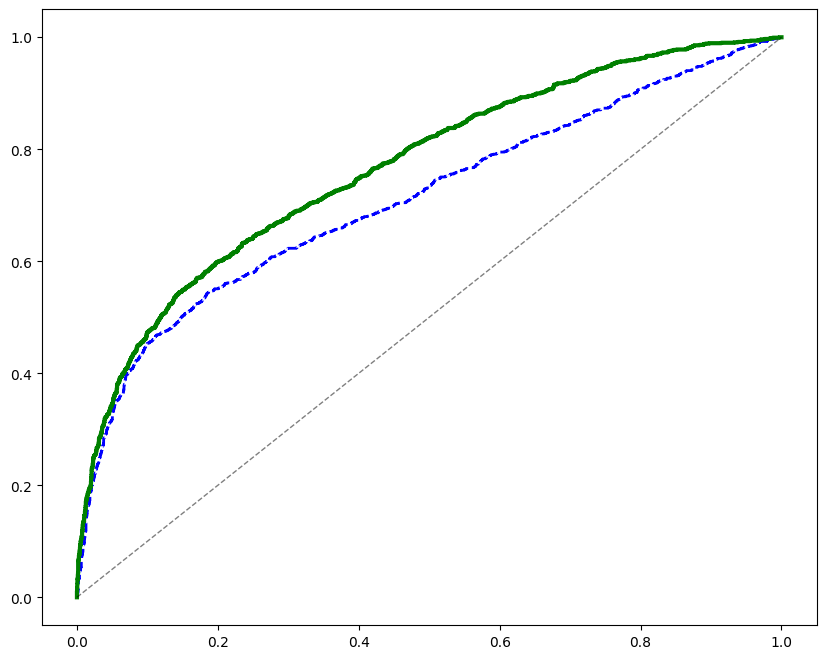

In [26]:
# Create ROC curves for both models
# ROC curve shows trade-off between TPR and FPR at various thresholds

print("📈 Step 11: Creating ROC Curves")

# Calculate ROC curve data for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)

# Calculate ROC curve data for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

print(f"\n📊 ROC-AUC Scores:")
print(f"   Logistic Regression: {roc_auc_log:.4f}")
print(f"   Gradient Boosting: {roc_auc_gb:.4f}")
print(f"   Improvement: {(roc_auc_gb-roc_auc_log)*100:.2f}%")

# Create ROC curve plot
plt.figure(figsize=(10, 8))

# Plot Logistic Regression ROC curve
plt.plot(fpr_log, tpr_log, 
         label=f'Logistic Regression (AUC = {roc_auc_log:.3f})', 
         linestyle='--', linewidth=2, color='blue')

# Plot Gradient Boosting ROC curve
plt.plot(fpr_gb, tpr_gb, 
         label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})', 
         linewidth=3, color='green')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', 
         alpha=0.5, linewidth=1)

# Mark the point for optimal threshold on Gradient Boosting curve
# Find closest point to optimal threshold
optimal_point_idx = np.argmin(np.abs(thresholds - optimal_threshold))
plt.plot(fpr_gb[optimal_point_idx], tpr_gb[optimal_point_idx], 'ro', 
         markersize=10, label=f'Optimal Threshold ({optimal_threshold:.3f})')

# Add threshold annotations
threshold_points = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for thresh in threshold_points:
    idx = np.argmin(np.abs(thresholds - thresh))
    if idx < len(fpr_gb):
        plt.annotate(f'{thresh}', 
                    (fpr_gb[idx], tpr_gb[idx]),
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                    fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Customize the plot
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Credit Default Prediction', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Add shaded area to highlight improvement
plt.fill_between(fpr_log, tpr_log, tpr_gb, alpha=0.1, color='green', 
                 label=f'Improvement Area')

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add text box with interpretation
textstr = f'Better model curves closer to top-left corner\nGradient Boosting outperforms Logistic Regression'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.6, 0.2, textstr, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()



In [27]:
# Save all metrics to JSON file as required
# JSON format is portable and easy to read

print("💾 Step 12: Saving Metrics to JSON")

# Create comprehensive metrics dictionary
metrics = {
    "project_info": {
        "name": "Credit Default Prediction",
        "type": "Binary Classification",
        "dataset": "UCI Credit Card",
        "date": str(pd.Timestamp.now().date())
    },
    
    "dataset_info": {
        "total_samples": int(len(df)),
        "training_samples": int(len(X_train)),
        "test_samples": int(len(X_test)),
        "features_count": int(X.shape[1]),
        "class_distribution": {
            "non_default": int(sum(y==0)),
            "default": int(sum(y==1)),
            "imbalance_ratio": float(sum(y==0) / sum(y==1))
        }
    },
    
    "class_imbalance_handling": {
        "method": "SMOTE",
        "before_smote": {
            "non_default": int(sum(y_train==0)),
            "default": int(sum(y_train==1))
        },
        "after_smote": {
            "non_default": int(sum(y_train_balanced==0)),
            "default": int(sum(y_train_balanced==1))
        }
    },
    
    "model_comparison": {
        "logistic_regression": {
            "f1_score": float(f1_log),
            "roc_auc": float(roc_auc_log),
            "precision": float(precision_score(y_test, y_pred_log)),
            "recall": float(recall_score(y_test, y_pred_log)),
            "accuracy": float(accuracy_score(y_test, y_pred_log))
        },
        "gradient_boosting": {
            "f1_score": float(f1_gb),
            "roc_auc": float(roc_auc_gb),
            "precision": float(precision_score(y_test, y_pred_gb)),
            "recall": float(recall_score(y_test, y_pred_gb)),
            "accuracy": float(accuracy_score(y_test, y_pred_gb))
        }
    },
    
    "threshold_tuning": {
        "default_threshold": 0.5,
        "optimal_threshold": float(optimal_threshold),
        "f1_score_before_tuning": float(f1_gb),
        "f1_score_after_tuning": float(f1_optimal),
        "improvement": float(f1_optimal - f1_gb),
        "precision_after_tuning": float(precision_optimal),
        "recall_after_tuning": float(recall_optimal)
    },
    
    "confusion_matrices": {
        "default_threshold": {
            "true_negative": int(cm_default[0, 0]),
            "false_positive": int(cm_default[0, 1]),
            "false_negative": int(cm_default[1, 0]),
            "true_positive": int(cm_default[1, 1]),
            "total_predictions": int(np.sum(cm_default))
        },
        "optimal_threshold": {
            "true_negative": int(cm_optimal[0, 0]),
            "false_positive": int(cm_optimal[0, 1]),
            "false_negative": int(cm_optimal[1, 0]),
            "true_positive": int(cm_optimal[1, 1]),
            "total_predictions": int(np.sum(cm_optimal))
        }
    },
    
    "business_metrics": {
        "default_threshold": {
            "missed_defaults": int(cm_default[1, 0]),
            "false_alarms": int(cm_default[0, 1]),
            "correct_defaults": int(cm_default[1, 1])
        },
        "optimal_threshold": {
            "missed_defaults": int(cm_optimal[1, 0]),
            "false_alarms": int(cm_optimal[0, 1]),
            "correct_defaults": int(cm_optimal[1, 1])
        }
    }
}

# Save to JSON file with proper formatting
with open('metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

print("\n📋 Metrics saved to 'metrics.json'")
print("\n📊 JSON File Contents Summary:")
print(json.dumps(metrics, indent=2)[:500] + "...")  # Show first 500 chars

# Verify file was created
if os.path.exists('metrics.json'):
    file_size = os.path.getsize('metrics.json')
    print(f"\n✅ File created successfully: metrics.json ({file_size} bytes)")
    
    # Show key metrics
    print("\n🔑 Key Metrics Summary:")
    print(f"   Best F1 Score: {metrics['threshold_tuning']['f1_score_after_tuning']:.4f}")
    print(f"   Best ROC-AUC: {metrics['model_comparison']['gradient_boosting']['roc_auc']:.4f}")
    print(f"   Optimal Threshold: {metrics['threshold_tuning']['optimal_threshold']:.4f}")
    print(f"   Improvement over baseline: {metrics['threshold_tuning']['improvement']*100:.2f}%")



💾 Step 12: Saving Metrics to JSON

📋 Metrics saved to 'metrics.json'

📊 JSON File Contents Summary:
{
  "project_info": {
    "name": "Credit Default Prediction",
    "type": "Binary Classification",
    "dataset": "UCI Credit Card",
    "date": "2026-02-16"
  },
  "dataset_info": {
    "total_samples": 30000,
    "training_samples": 24000,
    "test_samples": 6000,
    "features_count": 23,
    "class_distribution": {
      "non_default": 23364,
      "default": 6636,
      "imbalance_ratio": 3.5207956600361663
    }
  },
  "class_imbalance_handling": {
    "method": "SMOTE",
    "before_smot...

✅ File created successfully: metrics.json (2470 bytes)

🔑 Key Metrics Summary:
   Best F1 Score: 0.5302
   Best ROC-AUC: 0.7666
   Optimal Threshold: 0.4697
   Improvement over baseline: 0.78%


In [29]:
# ============================================
# PART 1: TRAIN AND SAVE THE MODEL (RUN THIS FIRST!)
# ============================================

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import os
import warnings
warnings.filterwarnings('ignore')

print("="*50)
print("🔧 PART 1: TRAINING THE MODEL")
print("="*50)

# Find the dataset
print("\n📁 Looking for dataset...")
file_path = None
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv') and 'credit' in filename.lower():
            file_path = os.path.join(dirname, filename)
            print(f"✅ Found dataset: {file_path}")
            break

if file_path is None:
    # Try common paths
    possible_paths = [
        '/kaggle/input/uci-credit-card/UCI_Credit_Card.csv',
        '/kaggle/input/credit-card-default-prediction/UCI_Credit_Card.csv',
        '/kaggle/input/credit-default-prediction/UCI_Credit_Card.csv'
    ]
    for path in possible_paths:
        if os.path.exists(path):
            file_path = path
            print(f"✅ Found dataset: {file_path}")
            break

if file_path is None:
    raise FileNotFoundError("❌ Could not find dataset! Please check the path.")

# Load data
print("\n📊 Loading dataset...")
df = pd.read_csv(file_path)
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")

# Identify target column
target_col = None
for col in df.columns:
    if 'default' in col.lower():
        target_col = col
        break
if target_col is None:
    target_col = df.columns[-1]  # Assume last column

print(f"   Target column: '{target_col}'")

# Prepare features and target
if 'ID' in df.columns:
    X = df.drop(['ID', target_col], axis=1)
else:
    X = df.drop([target_col], axis=1)
y = df[target_col]

print(f"   Features: {X.shape[1]}")
print(f"   Samples: {len(X)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"   Training: {len(X_train)} samples")
print(f"   Testing: {len(X_test)} samples")

# Scale features
print("\n⚖️ Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
print("\n🔄 Applying SMOTE to handle imbalance...")
print(f"   Before SMOTE - Class 0: {sum(y_train==0)}, Class 1: {sum(y_train==1)}")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"   After SMOTE - Class 0: {sum(y_train_balanced==0)}, Class 1: {sum(y_train_balanced==1)}")

# Train model
print("\n🤖 Training Gradient Boosting model...")
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)
print("✅ Model training complete!")

# Save ALL components
print("\n💾 Saving model files...")
joblib.dump(model, 'credit_default_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
print("✅ Files saved:")
print("   - credit_default_model.pkl")
print("   - scaler.pkl")
print("   - feature_names.pkl")

# Quick test
print("\n🔍 Quick test on test data...")
y_pred = model.predict(scaler.transform(X_test))
accuracy = (y_pred == y_test).mean()
print(f"   Test accuracy: {accuracy:.4f}")

print("\n" + "="*50)
print("✅ PART 1 COMPLETE! Model is trained and saved.")
print("👉 Now you can run PART 2 for predictions!")
print("="*50)

🔧 PART 1: TRAINING THE MODEL

📁 Looking for dataset...
✅ Found dataset: /kaggle/input/datasets/hassanamin/uci-credit-card/UCI_Credit_Card.csv

📊 Loading dataset...
   Shape: (30000, 25)
   Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target']
   Target column: 'target'
   Features: 23
   Samples: 30000

📊 Data Split:
   Training: 24000 samples
   Testing: 6000 samples

⚖️ Scaling features...

🔄 Applying SMOTE to handle imbalance...
   Before SMOTE - Class 0: 18691, Class 1: 5309
   After SMOTE - Class 0: 18691, Class 1: 18691

🤖 Training Gradient Boosting model...
✅ Model training complete!

💾 Saving model files...
✅ Files saved:
   - credit_default_model.pkl
   - scaler.pkl
   - feature_names.pkl

🔍 Quick test on test data...
   Test accuracy: 0.7955

✅ PART 1 

In [30]:
# ============================================
# PART 2: USER INPUT + PREDICTION (RUN THIS SECOND!)
# ============================================

import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

print("="*50)
print("🏦 CREDIT DEFAULT PREDICTION SYSTEM")
print("="*50)

# Check if model files exist
import os
if not os.path.exists('credit_default_model.pkl'):
    print("\n❌ ERROR: Model files not found!")
    print("   Please run PART 1 first to train and save the model.")
    print("   Or check if you're in the correct directory.")
    print("\n📁 Files in current directory:")
    for f in os.listdir('.'):
        print(f"   - {f}")
    raise FileNotFoundError("Run PART 1 first!")

# Load the trained model and components
print("\n📂 Loading trained model...")
model = joblib.load('credit_default_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_names = joblib.load('feature_names.pkl')
print("✅ Model loaded successfully!")

print("\n" + "="*50)
print("📝 CUSTOMER DATA ENTRY")
print("="*50)
print("\nPlease enter the following information:")

# Create dictionary to store user input
user_data = {}

# 1. Personal Information
print("\n--- PERSONAL INFORMATION ---")
user_data['LIMIT_BAL'] = float(input("Credit Limit (in NT dollars): "))
user_data['SEX'] = int(input("Sex (1=male, 2=female): "))
user_data['EDUCATION'] = int(input("Education (1=graduate, 2=university, 3=high school, 4=others): "))
user_data['MARRIAGE'] = int(input("Marriage (1=married, 2=single, 3=others): "))
user_data['AGE'] = int(input("Age (in years): "))

# 2. Payment History
print("\n--- PAYMENT HISTORY (last 6 months) ---")
print("Status values:")
print("  -2 = No consumption")
print("  -1 = Paid fully")
print("   0 = Paid minimum")
print("   1 = 1 month late")
print("   2 = 2 months late")
print("   3 = 3+ months late")
user_data['PAY_0'] = int(input("Payment status in September: "))
user_data['PAY_2'] = int(input("Payment status in August: "))
user_data['PAY_3'] = int(input("Payment status in July: "))
user_data['PAY_4'] = int(input("Payment status in June: "))
user_data['PAY_5'] = int(input("Payment status in May: "))
user_data['PAY_6'] = int(input("Payment status in April: "))

# 3. Bill Amounts
print("\n--- BILL AMOUNTS (last 6 months) ---")
user_data['BILL_AMT1'] = float(input("Bill amount in September (NT$): "))
user_data['BILL_AMT2'] = float(input("Bill amount in August (NT$): "))
user_data['BILL_AMT3'] = float(input("Bill amount in July (NT$): "))
user_data['BILL_AMT4'] = float(input("Bill amount in June (NT$): "))
user_data['BILL_AMT5'] = float(input("Bill amount in May (NT$): "))
user_data['BILL_AMT6'] = float(input("Bill amount in April (NT$): "))

# 4. Payment Amounts
print("\n--- PAYMENT AMOUNTS (last 6 months) ---")
user_data['PAY_AMT1'] = float(input("Amount paid in September (NT$): "))
user_data['PAY_AMT2'] = float(input("Amount paid in August (NT$): "))
user_data['PAY_AMT3'] = float(input("Amount paid in July (NT$): "))
user_data['PAY_AMT4'] = float(input("Amount paid in June (NT$): "))
user_data['PAY_AMT5'] = float(input("Amount paid in May (NT$): "))
user_data['PAY_AMT6'] = float(input("Amount paid in April (NT$): "))

# Convert to DataFrame
input_df = pd.DataFrame([user_data])

# Ensure columns are in correct order
input_df = input_df[feature_names]

# Scale the input data
input_scaled = scaler.transform(input_df)

# MAKE PREDICTION
print("\n" + "="*50)
print("🔮 ANALYZING CUSTOMER DATA...")
print("="*50)

# Get probability
probability = model.predict_proba(input_scaled)[0][1]
prediction = model.predict(input_scaled)[0]

# Display results
print("\n📊 PREDICTION RESULTS:")
print("-" * 40)

# Show probability
print(f"Default Probability: {probability*100:.1f}%")

# Show prediction
if prediction == 1:
    print("🚨 PREDICTION: Customer WILL DEFAULT")
    print("   ⚠️  HIGH RISK - Take action!")
else:
    print("✅ PREDICTION: Customer WILL NOT DEFAULT")
    print("   👍 LOW RISK - No action needed")

# Risk level
print("\n📈 RISK ASSESSMENT:")
if probability < 0.3:
    print("   Risk Level: LOW 🟢")
    print("   Recommendation: Approve, good customer")
elif probability < 0.6:
    print("   Risk Level: MEDIUM 🟡")
    print("   Recommendation: Monitor closely")
else:
    print("   Risk Level: HIGH 🔴")
    print("   Recommendation: Review account, consider reducing limit")

# Confidence
confidence = max(probability, 1-probability) * 100
print(f"\n💯 Model Confidence: {confidence:.1f}%")

print("\n" + "="*50)

🏦 CREDIT DEFAULT PREDICTION SYSTEM

📂 Loading trained model...
✅ Model loaded successfully!

📝 CUSTOMER DATA ENTRY

Please enter the following information:

--- PERSONAL INFORMATION ---


Credit Limit (in NT dollars):  20
Sex (1=male, 2=female):  2
Education (1=graduate, 2=university, 3=high school, 4=others):  2
Marriage (1=married, 2=single, 3=others):  2
Age (in years):  21



--- PAYMENT HISTORY (last 6 months) ---
Status values:
  -2 = No consumption
  -1 = Paid fully
   0 = Paid minimum
   1 = 1 month late
   2 = 2 months late
   3 = 3+ months late


Payment status in September:  4
Payment status in August:  9
Payment status in July:  9
Payment status in June:  0
Payment status in May:  9
Payment status in April:  7



--- BILL AMOUNTS (last 6 months) ---


Bill amount in September (NT$):  6
Bill amount in August (NT$):  7
Bill amount in July (NT$):  5
Bill amount in June (NT$):  3
Bill amount in May (NT$):  1
Bill amount in April (NT$):  4



--- PAYMENT AMOUNTS (last 6 months) ---


Amount paid in September (NT$):  8
Amount paid in August (NT$):  9
Amount paid in July (NT$):  8
Amount paid in June (NT$):  7
Amount paid in May (NT$):  5
Amount paid in April (NT$):  7



🔮 ANALYZING CUSTOMER DATA...

📊 PREDICTION RESULTS:
----------------------------------------
Default Probability: 64.6%
🚨 PREDICTION: Customer WILL DEFAULT
   ⚠️  HIGH RISK - Take action!

📈 RISK ASSESSMENT:
   Risk Level: HIGH 🔴
   Recommendation: Review account, consider reducing limit

💯 Model Confidence: 64.6%

